In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE, chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [47]:
data=pd.read_csv("adult.csv")

In [48]:
df=pd.DataFrame(data)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
data.info

<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

In [50]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [51]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [52]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [53]:
df.shape

(32561, 15)

In [54]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [55]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [56]:
df.duplicated().sum()

24

In [57]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [58]:
df.shape

(32537, 15)

In [59]:
df.duplicated().sum()


0

In [60]:
#FIND OUTLIERS(DRAW BOXPLOT,GRP THE NUMERICAL COLUMNS)

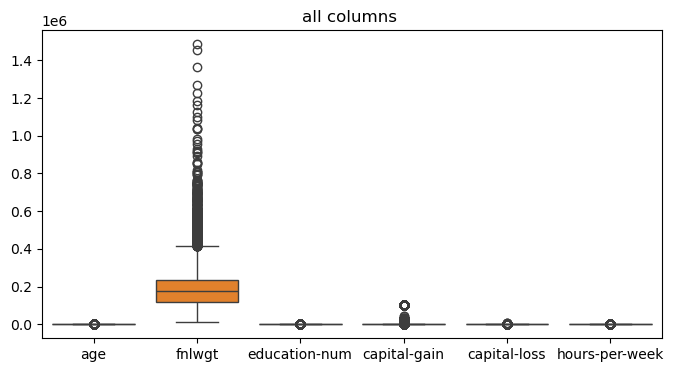

In [61]:
plt.figure(figsize=(8,4))
sns.boxplot(df)
plt.title('all columns ')
plt.show()

In [62]:
def handling_outliers(data):
    # Ensure data is a DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a Pandas DataFrame")

    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        # Example logic to handle outliers (replace with your logic)
        df[col] = df[col].clip(lower=q1 - 1.5 * iqr, upper=q3 + 1.5 * iqr)
    return df

# Call the function
df1 = handling_outliers(data)
print(df1)


       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors           13.0   
1       50  Self-emp-not-inc   83311   Bachelors           13.0   
2       38           Private  215646     HS-grad            9.0   
3       53           Private  234721        11th            7.0   
4       28           Private  338409   Bachelors           13.0   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm           12.0   
32557   40           Private  154374     HS-grad            9.0   
32558   58           Private  151910     HS-grad            9.0   
32559   22           Private  201490     HS-grad            9.0   
32560   52      Self-emp-inc  287927     HS-grad            9.0   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-manag

In [63]:
df1 = handling_outliers(df)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [64]:
df1.shape

(32537, 15)

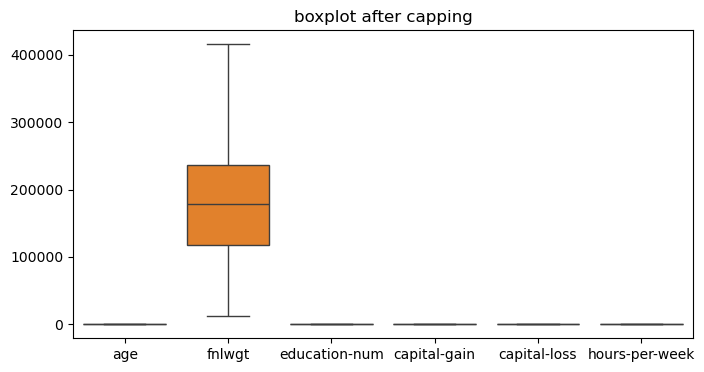

In [65]:
plt.figure(figsize=(8,4))
sns.boxplot(df1)
plt.title('boxplot after capping')
plt.show()

In [66]:
# HISTPLOT

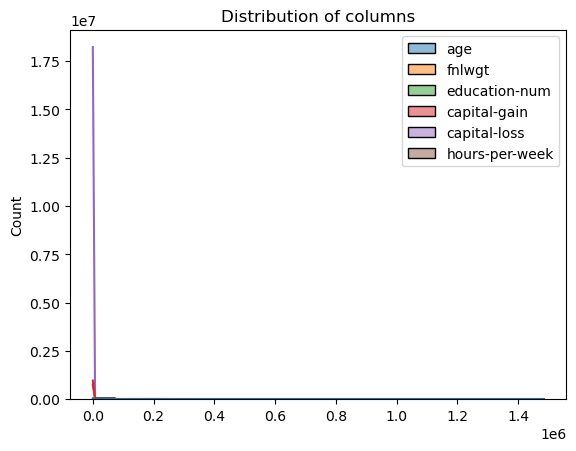

In [67]:
# Histogram for hours-per-week
sns.histplot(data=data, kde=True, bins=20)
plt.title("Distribution of columns")
plt.show()

In [68]:
#FIND SKEWNESS

In [69]:
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
from scipy.stats import skew

for col in numerical_columns:
    skewness_value = skew(data[col].dropna()) 
    
    # Drop NaN values for accurate calculation
    
    print(f'Skewness of {col}: {skewness_value:.4f}')

Skewness of age: 0.5587
Skewness of fnlwgt: 1.4469
Skewness of education-num: -0.3117
Skewness of capital-gain: 11.9533
Skewness of capital-loss: 4.5944
Skewness of hours-per-week: 0.2276


In [70]:
# CORRELATION HEATMAP

In [71]:
df_encoded=pd.get_dummies(df1,drop_first=True)
df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,39,77516,13.0,0,0,40.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13.0,0,0,32.5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12.0,0,0,38.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32557,40,154374,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
32558,58,151910,9.0,0,0,40.0,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
32559,22,201490,9.0,0,0,32.5,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [72]:
corr_matrix=df_encoded.corr()
corr_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
age,1.000000,-0.077169,0.047012,NaN,NaN,0.091242,0.051676,0.061139,-0.019468,-0.198822,...,0.008065,0.002631,0.000147,-0.013845,-0.006275,0.004915,0.015677,-0.015081,0.000413,0.235830
fnlwgt,-0.077169,1.000000,-0.039794,NaN,NaN,-0.025753,-0.008770,-0.001244,0.005014,0.043132,...,0.008508,-0.003610,-0.012184,-0.000900,-0.000658,0.002717,-0.077752,-0.011243,0.004731,-0.008420
education-num,0.047012,-0.039794,1.000000,NaN,NaN,0.184978,0.060361,0.100373,-0.015658,-0.120959,...,-0.038865,0.000975,0.016020,0.051053,0.007837,-0.017266,0.076595,-0.006309,-0.001411,0.342360
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Trinadad&Tobago,0.004915,0.002717,-0.017266,NaN,NaN,-0.004392,-0.004215,-0.001152,-0.000355,0.002104,...,-0.001433,-0.000464,-0.001200,-0.000958,-0.000569,1.000000,-0.070948,-0.001098,-0.000536,-0.007668
native-country_United-States,0.015677,-0.077752,0.076595,NaN,NaN,0.017456,0.015377,0.033110,0.004998,-0.042912,...,-0.174041,-0.056378,-0.145719,-0.116296,-0.069055,-0.070948,1.000000,-0.133328,-0.065104,0.034206
native-country_Vietnam,-0.015081,-0.011243,-0.006309,NaN,NaN,-0.013929,0.000093,-0.003620,-0.000666,0.009311,...,-0.002694,-0.000873,-0.002255,-0.001800,-0.001069,-0.001098,-0.133328,1.000000,-0.001008,-0.017665
native-country_Yugoslavia,0.000413,0.004731,-0.001411,NaN,NaN,0.007337,-0.003867,-0.000165,-0.000325,0.005582,...,-0.001315,-0.000426,-0.001101,-0.000879,-0.000522,-0.000536,-0.065104,-0.001008,1.000000,0.006954


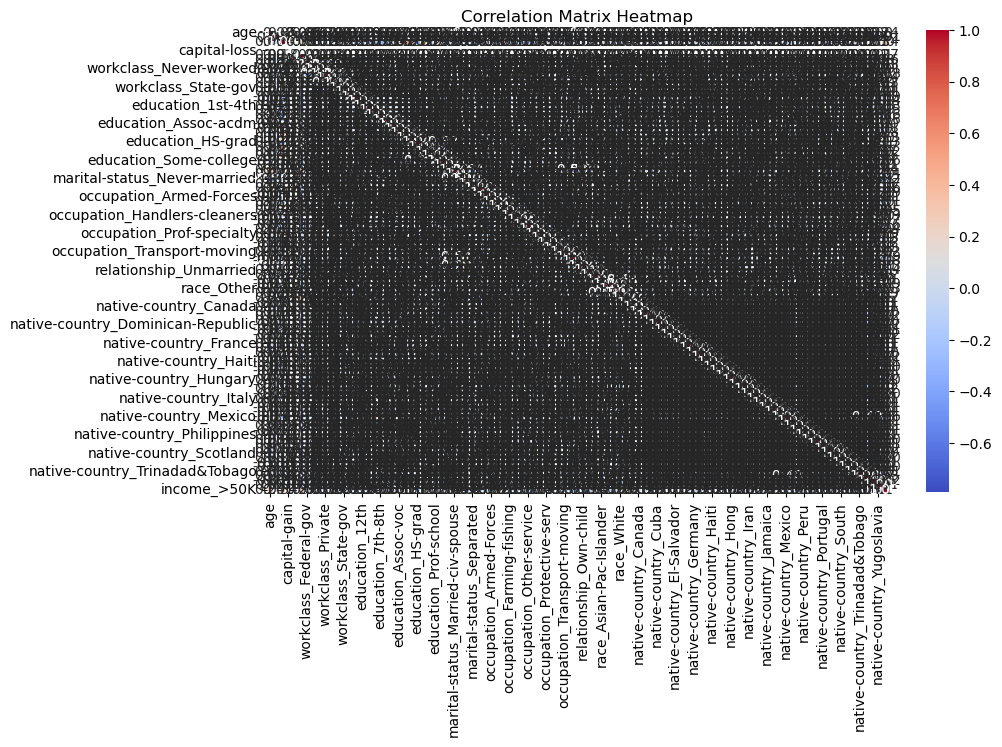

In [73]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [74]:
#VISUALISATION DISTRIBUTION  OF NUMERICAL FEATURES

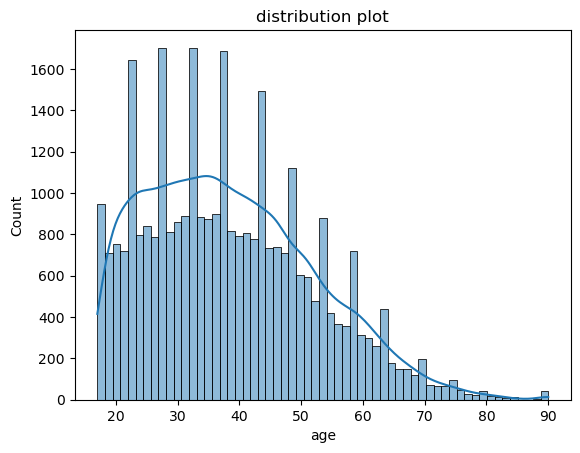

In [75]:
sns.histplot(data=data,x=data.age,kde=True)
plt.title('distribution plot')
plt.show()


In [76]:
#COUNTPLOT FOR CATEGORICAL VARIABLES

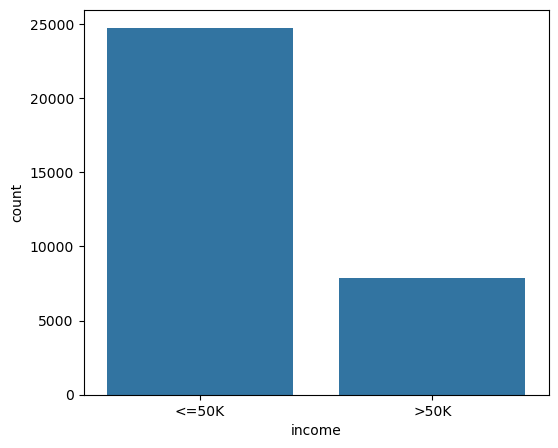

In [77]:
plt.figure(figsize=(6, 5))
sns.countplot(x='income',data=data)
plt.show()

In [78]:
#SCATTER PLOT

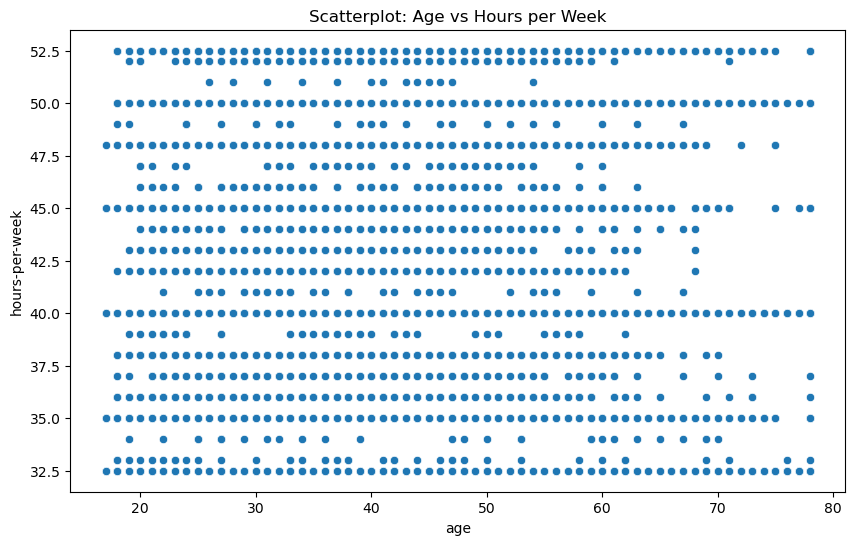

In [79]:
# Scatter plot of age vs hours-per-week


plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='hours-per-week', data=df_encoded)
plt.title("Scatterplot: Age vs Hours per Week")
plt.show()

In [80]:
import pandas as pd
from scipy.stats import kurtosis
for col in numerical_columns:
    kurtosis_value = kurtosis(data[col].dropna(), fisher=True)  
    
    # Drop NaN values for accurate calculation
    print(f'Kurtosis of {col}: {kurtosis_value:.4f}')

Kurtosis of age: -0.1663
Kurtosis of fnlwgt: 6.2177
Kurtosis of education-num: 0.6232
Kurtosis of capital-gain: 154.7755
Kurtosis of capital-loss: 20.3735
Kurtosis of hours-per-week: 2.9161


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

In [82]:
# Features and target
X = df.drop(columns=['income'])  # Features
y = df['income']

# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [83]:
# Step 2: Feature Selection (on Training Set)

# Encode categorical features for Chi-Square

le = LabelEncoder()
categorical_features = X_train.select_dtypes(include='object').columns
for col in categorical_features:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])  # Apply same transformation to test set

In [84]:
# Select top 5 features
feature_selector = SelectKBest(chi2, k=5)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)


# Get selected feature names
selected_features = X_train.columns[feature_selector.get_support()]
print("Selected Features:", selected_features)

# Step 3: Scaling (on Selected Features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Final Training and Testing Sets
print("Final Training Set Shape:", X_train_scaled.shape)
print("Final Testing Set Shape:", X_test_scaled.shape)

Selected Features: Index(['age', 'fnlwgt', 'education-num', 'relationship', 'hours-per-week'], dtype='object')
Final Training Set Shape: (26029, 5)
Final Testing Set Shape: (6508, 5)


In [85]:
 #Apply MinMax Scaling
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the scaled dataset
print(df.head())

        age         workclass    fnlwgt  education  education-num  \
0  0.360656         State-gov  0.161680  Bachelors       0.739130   
1  0.540984  Self-emp-not-inc  0.176044  Bachelors       0.739130   
2  0.344262           Private  0.504046    HS-grad       0.391304   
3  0.590164           Private  0.551325       11th       0.217391   
4  0.180328           Private  0.808324  Bachelors       0.739130   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0           0.0           0.0           0.375  United-States  <=50K  


In [86]:


# Train and evaluate multiple models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

results = {}


In [87]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)



 # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

Model: Random Forest
Accuracy: 0.8294406883835279
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4940
        >50K       0.67      0.57      0.62      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.74      0.75      6508
weighted avg       0.82      0.83      0.82      6508

Model: Gradient Boosting
Accuracy: 0.8443454210202828
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4940
        >50K       0.72      0.57      0.64      1568

    accuracy                           0.84      6508
   macro avg       0.80      0.75      0.77      6508
weighted avg       0.84      0.84      0.84      6508



C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.7884142593730793
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.82      0.93      0.87      4940
        >50K       0.60      0.35      0.45      1568

    accuracy                           0.79      6508
   macro avg       0.71      0.64      0.66      6508
weighted avg       0.77      0.79      0.77      6508

Model: Decision Tree
Accuracy: 0.7795021511985248
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.86      0.85      0.85      4940
        >50K       0.54      0.56      0.55      1568

    accuracy                           0.78      6508
   macro avg       0.70      0.70      0.70      6508
weighted avg       0.78      0.78      0.78      6508

Model: Support Vector Machine
Accuracy: 0.7590657652120467
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4940


C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASAA\.ipython\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Identify the best model based on test accuracy
best_model_name = max(results, key=results.get)
print(f"The best model based on test accuracy is: {best_model_name}")


In [93]:
# Generate unseen data for testing
unseen_data = pd.DataFrame({
    'Age': np.random.randint(18, 70, 10),
    'Gender': np.random.choice(['Male', 'Female'], 10),
    'Education': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], 10),
    'Occupation': np.random.choice(['Software Engineer', 'Teacher', 'Retail Worker', 'Nurse', 'Doctor'], 10),
    'Health Status': np.random.choice(['Excellent', 'Good', 'Fair', 'Poor'], 10),
    'Smoking': np.random.choice(['Yes', 'No'], 10),
    'Region': np.random.choice(['Urban', 'Rural'], 10),
    'Hours Worked': np.random.randint(20, 60, 10)
})


# Preprocess unseen data
unseen_data_encoded = pd.get_dummies(unseen_data, columns=['Gender', 'Education', 'Occupation', 'Health Status', 'Smoking', 'Region'], drop_first=True)

# Align unseen data with training features
unseen_data_encoded = unseen_data_encoded.reindex(columns=X_train.columns, fill_value=0)


In [94]:
# Test models on unseen data
print("\nTesting on Unseen Data:")
for name, model in models.items():
    unseen_predictions = model.predict(unseen_data_encoded)
    print(f"Model: {name}")
    print("Predictions:", unseen_predictions)



Testing on Unseen Data:
Model: Random Forest
Predictions: ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K']
Model: Gradient Boosting
Predictions: ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K']
Model: Logistic Regression
Predictions: ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K']
Model: Decision Tree
Predictions: ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K']
Model: Support Vector Machine
Predictions: ['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K']


In [95]:
# Save the dataset to a CSV file
data.to_csv('adult_dataset.csv', index=False)

# Display the first few rows of the dataset
print(data.head())

# Display model performance
print("\nModel Performance:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             